# Visualizing data in Python
A picture is worth a thousand words. In fact, most journal articles can be summarized by one good figure or one good table. This conjecture makes for a good rule for any researcher. "What is the best picture or table that can summarize the story I want to tell with my results." This section will focus on using data visualization as preliminary a way for understanding and interpreting your data. This chapter is about using visualization for exploring your data. But the principles can be applied to the later steps of presenting your results. 

The standard visualizations of any data are the scatterplot, the line plot, the bar graph, the histogram (a particular type of bar graph), There are 3-D versions of all of these. Then there are ways to allow each of these methods to display more than three dimensions of the data. Finally, recent developments in D3 (data-driven documents) JavaScript visualizations for web browsers have made interactive graphics available to the common internet user via flyover display, toggle switches, slider bars, and other methods.

We will focus on Python's `matplotlib` visualization package. But many other libraries exist in Python (e.g.scikitlearn, chaco, mayavi, bokeh), and many other programming platforms also have powerful visualization packages (e.g., R, Stata, SAS, MATLAB, Mathematica).

## 0. Some matplotlib preliminaries
Plots in matplotlib are stored as `Figure` objects. The command to create a new figure object is,

<IPython.core.display.Javascript object>


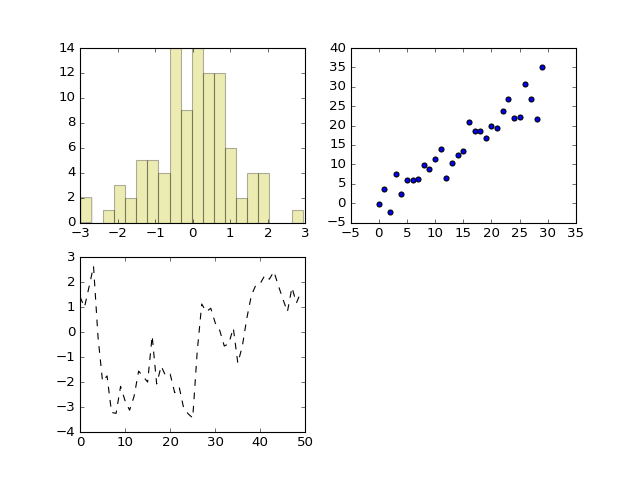

In [154]:
import matplotlib.pyplot as plt
# This next command is specifically for Jupyter Notebook
%matplotlib notebook

fig = plt.figure()

You can reference and change options in the active figure using the `plt.gcf()` function.

### 0.1. Subplot commands
When you declare a figure using the `plt.figure()` command, you must then declare how many subplots will be in the figure. This is done using the `add_subplot()` command. You have to create one or more subplots.

In [155]:
ax1 = fig.add_subplot(2, 2, 1)

In [156]:
ax2 = fig.add_subplot(2, 2, 2)

In [157]:
ax3 = fig.add_subplot(2, 2, 3)

Let's fill in the third subplot with a two-way line plot of some white noise. If we don't specify the axes of the specific subplot that we want, matplotlib will use the most recently created subplot

In [158]:
import numpy as np

plt.plot(np.random.randn(50).cumsum(), 'k--')

The `k--` is a style option instructing matplotlib to plot the data with a black dashed line. The objects returned by `fig.add_subplot()` avobe are `AxesSubPlot` objects on which you can directly plot on the other empty subplots by calling each one's instance methods.

In [159]:
_ = ax1.hist(np.random.randn(100), bins=20, color='y', alpha=0.3)

In [160]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30))

Since creating a figure with multiple subplots according to a particular layout is such a common task, there is a convenience method, `plt.subplots()`, that creates a new figure and returns a NumPy array containing the created subplot objects. This is very useful as the `axes` array can be easily indexed like a two-dimensional array--for example, `axes[0, 1]`. You can also indicate that subplots should have the same $x$ and $y$ axis using `sharex` and `sharey` options, respectively. This is especially useful when comparing data on the same scale; otherwise, matplotlib auto-scales plot limits independently

<IPython.core.display.Javascript object>


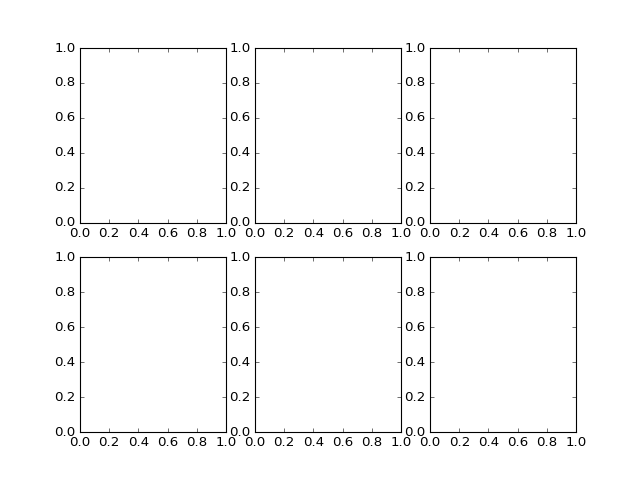

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125835048>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120691780>]], dtype=object)

In [161]:
fig, axes = plt.subplots(2, 3)
axes

### 0.2. Colors, markers, and line styles
Matplotlib can accept a single string argument that can encapsulate a subset of the options available in the `color`, `marker`, and `linestyle` options. For example, the following two commands do the same thing.

<IPython.core.display.Javascript object>


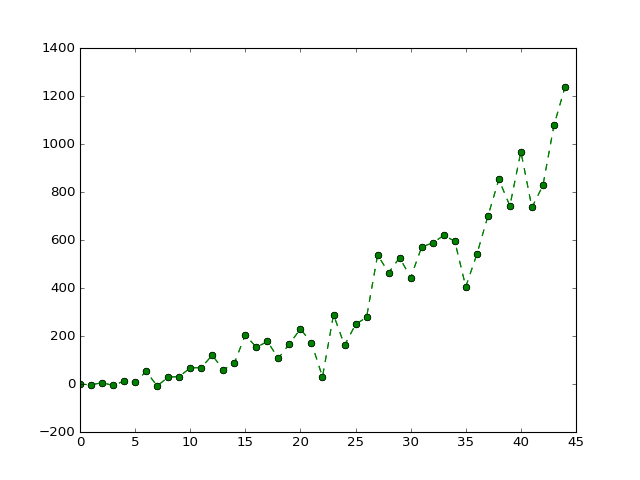

In [169]:
xx = np.arange(45)
yy = 0.5 * xx ** 2 - 3 * xx * np.random.randn(45)

plt.plot(xx, yy, 'go--')

<IPython.core.display.Javascript object>


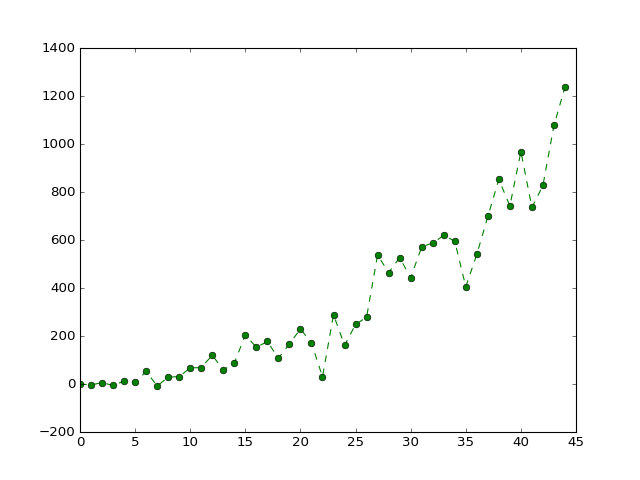

In [171]:
plt.plot(xx, yy, linestyle='--', color='g', marker='o')

### 0.3. Ticks, labels, and legends
asdf

### 0.4. Annotations and drawing on a Subplot
Annotations and text can be added using the `text`, `arrow`, and `annotate` functions. `text` draws text at given coordinates `(x, y)` on the plot with optional custom styling.
```python
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
```

<IPython.core.display.Javascript object>


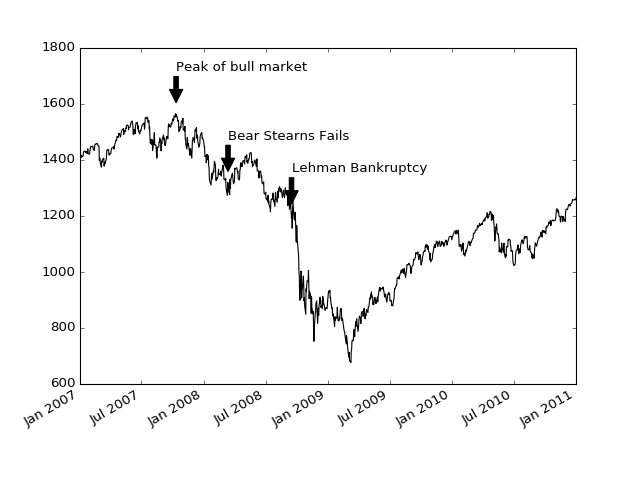

(600, 1800)

In [178]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

### 0.4. Saving figures
Good housekeeping in your file directories is an essential skill for any significant coding project. The directory of the main Python scripts can get cluttered with datafiles, scripts, modules, figure files, and other output files. It is good practice to save files to an "images" folder. I prefer to have that folder in the same directory as my calling Python scripts or modules. But in the following format, one can put the images folder anywhere to which the user's terminal can write. This code won't work in this Jupyter notebook.
```python
from matplotlib.ticker import MultipleLocator
import os

plot = True

if plot:
    '''
    --------------------------------------------------------------------
    cur_path    = string, path name of current directory
    output_fldr = string, folder in current path to save files
    output_dir  = string, total path of images folder
    output_path = string, path of file name of figure to be saved
    xx          = (45,) vector, values of xx
    yy          = (45,) vector, values of yy
    --------------------------------------------------------------------
    '''
    # Create directory if images directory does not already exist
    cur_path = os.path.split(os.path.abspath(__file__))[0]
    output_fldr = 'images'
    output_dir = os.path.join(cur_path, output_fldr)
    if not os.access(output_dir, os.F_OK):
        os.makedirs(output_dir)

    # Plot line plot of xx and yy
    xx = np.arange(45)
    yy = 0.5 * xx ** 2 - 3 * xx * np.random.randn(45)
    plt.plot(xx, yy, 'go--')
    # for the minor ticks, use no labels; default NullFormatter
    minorLocator = MultipleLocator(1)
    ax.xaxis.set_minor_locator(minorLocator)
    plt.grid(b=True, which='major', color='0.65', linestyle='-')
    plt.title('Line plot of X and Y', fontsize=20)
    plt.xlabel(r'$X$')
    plt.ylabel(r'$Y$')
    output_path = os.path.join(output_dir, 'xyplot')
    plt.savefig(output_path)
    # plt.show()
    plt.close()
```

This code won't work in this Jupyter notebook because of the line in which `cur_path` is set. This script is not being run from a traditional script and therefore cannot use that `os.path.split()` function. But lets go through some of the main principles in this code.
* It is often wise to set a Boolean in your script (`plot` in this example) to allow yourself to easily turn the plotting on and off within your code. Sometimes your plotting is just a diagnostic that you don't need to run every time with your analysis.
* Have your script intelligently choose the folder from which the plotting functionality is being called. This is the `cur_path = os.path.split()` line. Those lines check what the current directory is, check if a subdirectory named "images/" already exists, and makes that directory if it does not already exist. Then the `plt.savefig()` command saves the figure to that folder.
* At the end of a script that creates a figure, make sure to include the plt.close() command. If you don't do that, the matplotlib objects can pile up in your computer's memory--regardless of whether the plots are open and visible on your screen--and crash your computer.

## 1. The Almighty Histogram and its Friends

### 1.1. The cumulative distribution function
All the standard univariate descriptive statistics (e.g., mean, standard deviation, quantiles, autocorrelation) are simply statistics derived from the cumulative distribution function (*cdf*). The CDF $F$ of a random variable $X$ is defined as fraction of the values of $X$ that are greater than some realization of the random variable $x$.
$$F(x) \equiv Pr(X\leq x)$$
The estimator for the CDF is the empirical cumulative distribution function (*ecdf*) defined as:
$$F_n = \frac{\#\{x_i\leq x\}}{n} = \frac{\#x_i\in(-\infty, x]}{n} = \frac{1}{n}\sum_{i=1}^n I_{(-\infty, x]}(x_i)$$,
where $\{x_1,x_2,...x_n\}$ is a random sample of $n$ draws from $F$ and ,
$$I_A(x) = \begin{cases}1\quad\text{if}\quad x\in A \\ 0 \quad\text{if}\quad x\notin A.\end{cases}$$

Because the data for the *ecdf* are discrete, the *ecdf* is a stepwise linear (staircase) function. The Figure below shows the *ecdf* of Old Faithful eruption durations lasting longer than 3 seconds. The smooth red dotted line is a fitted continuous *cdf*.
![title](OldFaithfulCDF.png)

### 1.2. The univariate probability density function and the histogram
The most visually instructive transformation of the *cdf* is the probability density function (*pdf*). The value of the *pdf* at a given point does not have an intuitive interpretation. The *pdf* is the derivative or slope or rate of change of the *cdf*. But the *pdf* is good for describing what percent of the distribution lies between two values. The *pdf* $f$ is a function of particular values $x$ from the support of the random variable $X$ defined in the following way,
$$f(x)\equiv \frac{\partial F(x)}{\partial x}.$$

Scott (2015, p. 39) states that "the empirical probability density function *epdf* is always a discrete Uniform density over the data, that is, the probability mass $n^{-1}$ at each data point." This means that the *epdf* is not continuous, nor is it continuously differentiable. It is simply a one-dimensional scatter diagram with each marker lining up along $n^{-1}$ on the $y$ axis and at each data point on the $x$-axis.

A much more instructive representation of the empirical content of a probability density function is the *histogram*. It is more analogous to the discrete *ecdf* from the previous section. A histogram is an empirical estimator for the probability density function. A histogram $h(x)$ for a random variable $X$ is a set of nonoverlapping, contiguous intervals that include the entire support of $X$ that gives the count or frequency of observations in each bin. As such, a histogram $h(x)$ with $B$ bins is completely characterized by bin cutoffs $\{c_1,c_2,...c_B, c_{B+1}\}$. Let $bin_b$ be characterized by $x\in(c_b, c_{b+1}]$ The specification of the count version of the histogram is the following.
$$h(x) = \sum_{i=1}^N I_{bin_b}(x_i)$$
The bins need not have equal width, but that is usually the default for most histogram programming and graphical functions.

Use the penny thickness dataset `penny.csv`. Read it in to pandas. Reformat it to a Series with 90 elements such that each observation is a penny thickness. Create a histogram with 10 equally spaced bins.

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

pennies = pd.read_csv('penny.csv', names =['year', 'penny1', 'penny2'],
                      index_col='year', skiprows=[0, 1, 2, 3, 4, 5])
pennies_all = pennies.stack()
pennies_all

In [ ]:
plt.hist(pennies_all, 10)

Note that `plt.hist()` outputs three objects. The first is a list of counts in each bin (`n`). The second is a list of bin endpoints (`bin_cuts`), and the third is a list of patch objects. I have no idea what the patch objects are, but the `n` and `bin_cuts` are straightforward.

Now try a histogram with four equally spaced bins. Let's make the bin color green.

In [ ]:
n, bin_cuts, patches = plt.hist(pennies_all, 4, facecolor='green')

Now try a histogram with 90 equally spaced bins. Note that there are only 90 observations in the `pennies_all` data.

In [ ]:
n, bin_cuts, patches = plt.hist(pennies_all, 90)

The cardinal sin of visualizations is not labeling your plot and your axes. We have so far committed that cardinal sin. We can label the plot and the axes by using the following additional matplotlib options.

In [ ]:
n, bin_cuts, patches = plt.hist(pennies_all, 10)
plt.title('Histogram of penny thickness (mils): 1945-1989', fontsize=17)
plt.xlabel(r'Thickness (mils)')
plt.ylabel(r'Number of observations')

Now what if we wanted our histogram to be in frequency form rather than count form. The frequency form of a histogram is more analogous to the probability density function. It is simply a normalized version of the count histogram in which each observation is weighted by $n^{-1}$. We can implement this by creating a weight vector of $N$ elements, each of which is $n^{-1}$, we can then feed this directly into the histogram function.

In [ ]:
num_bins = 10
weights = (1 / pennies_all.shape[0]) * np.ones_like(pennies_all)
n, bin_cuts, patches = plt.hist(pennies_all, num_bins, weights=weights)
plt.title('Histogram of penny thickness (mils): 1945-1989', fontsize=17)
plt.xlabel(r'Thickness (mils)')
plt.ylabel(r'Percent of observations in bin')

You can verify that the percents in each bin sum to one.

In [ ]:
print(n.sum())

It would probably be more instructive if the labels on the $x$ axis were closer to the boundaries.

In [ ]:
n, bin_cuts, patches = plt.hist(pennies_all, num_bins, weights=weights)
plt.xticks(np.round_(bin_cuts, 1))
plt.title('Histogram of penny thickness (mils): 1945-1989', fontsize=17)
plt.xlabel(r'Thickness (mils)')
plt.ylabel(r'Percent of observations in bin')

There is no universal rule for what is the optimal number of bins and what are the optimal bin cutoff values. Some of the principles for making these decisions are based on minimizing error and asymptotic bias between the true probability density function $f(x)$ and the estimator of the *pdf* $h(x)$. A great reference for many optional rules is Scott (2015, chap. 3).

One of the most common of these rules is Sturges' number of bins rule for equal width bins. Let $k$ be the number of equal-width bins,
$$\textbf{Sturges' rule}:\quad k = \log_2 N$$
rounded to the nearest integer. This rule is based on the property that the observation counts in each bin of histogram $h(x)$ are themselvess binomial random variables. Sturges' rule gives a frequency histogram of normal density with mean $(k-1)/2$ and variance $(k-1)/4$. This rule is good for distributions that should be normal. In our penny thickness case, $k$ should equal 8.

In [ ]:
num_bins = np.ceil(1 + np.log2(90))
n, bin_cuts, patches = plt.hist(pennies_all, num_bins, weights=weights)
plt.xticks(np.round_(bin_cuts, 1))
plt.title('Histogram of penny thickness (mils): 1945-1989', fontsize=17)
plt.xlabel(r'Thickness (mils)')
plt.ylabel(r'Percent of observations in bin')

However, from previous versions of this histogram, it is clear that the distribution is not normal. In this case, Sturges' rule oversmoothes the distribution and we don't see the richness between thicknesses 52.0 and 55.0. A histogram with the correct thickness takes a little exploration.

### 1.3. The 3D histogram
A 3D histogram can be used as an estimator for a bivariate probability density function. Load in Old Faithful geyser duration data file `geyser.csv`. Make a 3D frequency histogram with geyser durations in the current period `duration(t)` on the $x$ axis and geyser durations in the next period `duration(t+1)` on the $y$ axis.

In [ ]:
geyser_dur = pd.read_csv('geyser.csv', names =['duration'])
geyser_dur

In [ ]:
dur_t = geyser_dur['duration'][:-1]
dur_tp1 = geyser_dur['duration'][1:]

To make a 3D histogram using matplotlib, you have to use the NumPy function `histogram2d()` and then port the objects into a 3D bar chart using matplotlib's `bar3D()` function.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

'''
--------------------------------------------------------------------
bin_num  = integer > 2, number of bins along each axis
hist     = (bin_num, bin_num) matrix, bin percentages
xedges   = (bin_num+1,) vector, bin edge values in x-dimension
yedges   = (bin_num+1,) vector, bin edge values in y-dimension
x_midp   = (bin_num,) vector, midpoints of bins in x-dimension
y_midp   = (bin_num,) vector, midpoints of bins in y-dimension
elements = integer, total number of 3D histogram bins
xpos     = (bin_num * bin_num) vector, x-coordinates of each bin
ypos     = (bin_num * bin_num) vector, y-coordinates of each bin
zpos     = (bin_num * bin_num) vector, zeros or z-coordinates of
            origin of each bin
dx       = (bin_num,) vector, x-width of each bin
dy       = (bin_num,) vector, y-width of each bin
dz       = (bin_num * bin_num) vector, height of each bin
--------------------------------------------------------------------
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
bin_num = int(9)
hist, xedges, yedges = np.histogram2d(dur_t, dur_tp1, bins=bin_num)
hist = hist / hist.sum()
x_midp = xedges[:-1] + 0.5 * (xedges[1] - xedges[0])
y_midp = yedges[:-1] + 0.5 * (yedges[1] - yedges[0])
elements = (len(xedges) - 1) * (len(yedges) - 1)
ypos, xpos = np.meshgrid(y_midp, x_midp)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = (xedges[1] - xedges[0]) * np.ones_like(bin_num)
dy = (yedges[1] - yedges[0]) * np.ones_like(bin_num)
dz = hist.flatten()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g', zsort='average')
ax.set_xlabel('duration(t) (mins.)')
ax.set_ylabel('duration(t+1) (mins.)')
ax.set_zlabel('Percent of obs.')
plt.title('Histogram by Old Faithful duration(t) and duration(t-1)')

### 1.4. The countour plot
A contour plot is a 2D version of the 3D histogram. It is like a topographical map. The contour plot fits smooth level curves to the density data. Contour plots can also include color scale for monotonically increasing levels of the variables. [TODO: Add material here.]

## 2. The scatter plot
The scatter plot is usually first in line among visualization tools for 2D data. Let the $i$th observation of the two dimensional data be represented by $(x_i, y_i)$. A scatter plot places markers at each point $(x_i, y_i)$ in a two-dimensional plot.

## 3. The line plot

### 3.1. Line plot

### 3.2. 3D surface plots

## 4. More than 3 dimensions

### 4.1. Plotting a time component with dynamic graphics

### 4.2. Brushing

### 4.3. Using glyphs

### 4.4. Chernoff faces

### 4.5. D3 javascript visualizations
slider bars, toggle buttons, flyover info

## References

* McKinney, Wes, Python for Data Analysis, O'Reilly Media, Inc. (2013).
* [Python labs](http://www.acme.byu.edu/?page_id=2067), Applied and Computational Mathematics Emphasis (ACME), Brigham Young University.
* Scott, D.W., Gotto, A.M., Cole, J.S., and Gorry, G.A., "Plasma Lipids as Collateral Risk Factors in Coronary Artery Disease: A Study of 371 Males with Chest Pain," *Journal of Chronic Diseases*, 31, pp. 337-345.
* Scott, David W., *Multivariate Density Estimation: Theory, Practice, and Visualization*, 2nd edition, John Wiley & Sons, Inc. (2015).